# **Crop Recommendation System**


## Introduction




In modern agriculture, selecting the most suitable crop for cultivation based on environmental and soil conditions is crucial for optimizing yield and ensuring sustainable farming practices. This **Crop Recommendation System** utilizes machine learning techniques to recommend the most appropriate crop based on essential soil and climate parameters.

#### Dataset Overview

The dataset comprises key agricultural attributes that influence crop selection, including:

- **Soil Nutrients**:  
  - **N** (Nitrogen)  
  - **P** (Phosphorus)  
  - **K** (Potassium)  

- **Environmental Factors**:  
  - **Temperature (°C)**  
  - **Humidity (%)**  
  - **Rainfall (mm)**  

- **Soil Acidity**:  
  - **pH Level**  

- **Target Variable**:  
  - **Label** (Recommended Crop)  

This dataset serves as the foundation for training a predictive model that can analyze soil and climate conditions to suggest the most suitable crop for a given scenario. By leveraging machine learning, farmers and agricultural experts can make data-driven decisions, leading to improved productivity and resource efficiency.



<div style="width: 100%; text-align: center;">

<hr style="height: 10px; width: 100%; background-color: white; border: none; margin-top: 10px; margin-bottom: 10px;">
</div>



<img src="crop.jpg" alt="ok" style="width: 100%; max-height: 500px; object-fit: cover;">


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

---


## Loading and Preprocessing the dataset 

To ensure optimal model performance and reliable recommendations, the dataset undergoes a series of preprocessing steps, including handling missing values, encoding categorical data, and normalizing numerical attributes.

#### 1. Handling Missing Values  
Missing data can affect model accuracy. The dataset is checked for missing values and any such instances are removed to ensure completeness.

#### 2. Removing Duplicate Records  
Duplicate rows are identified and removed to prevent data redundancy and bias in model training.

#### 3. Encoding Categorical Labels  
The **"label"** column, which represents different crop names, is a categorical variable. To make it suitable for machine learning algorithms, it is encoded into numerical form using **Label Encoding**.

#### 4. Normalization of Features  
To standardize the dataset and improve model performance, **Min-Max Normalization** is applied to scale numerical features between **0 and 1**. The following attributes are normalized:  
- **N (Nitrogen)**
- **P (Phosphorus)**
- **K (Potassium)**
- **Temperature (°C)**
- **Humidity (%)**
- **pH Level**
- **Rainfall (mm)**

Normalization ensures that all features contribute equally during model training, preventing dominance by attributes with larger values.



In [ ]:
df = pd.read_csv("dataset_new.csv")

missing_values = df.isnull().sum()

duplicate_rows = df.duplicated().sum()

df_cleaned = df.dropna()

label_encoder = LabelEncoder()
df_cleaned['label'] = label_encoder.fit_transform(df_cleaned['label'])

scaler = MinMaxScaler()
columns_to_normalize = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
df_cleaned[columns_to_normalize] = scaler.fit_transform(df_cleaned[columns_to_normalize])

df_cleaned.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,0.642857,0.264286,0.190,0.345886,0.790267,0.466264,0.656458,20
1,0.607143,0.378571,0.180,0.371445,0.770633,0.549480,0.741675,20
2,0.428571,0.357143,0.195,0.406854,0.793977,0.674219,0.875710,20
3,0.528571,0.214286,0.175,0.506901,0.768751,0.540508,0.799905,20
4,0.557143,0.264286,0.185,0.324378,0.785626,0.641291,0.871231,20


---

## Exploratory Data Analysis 

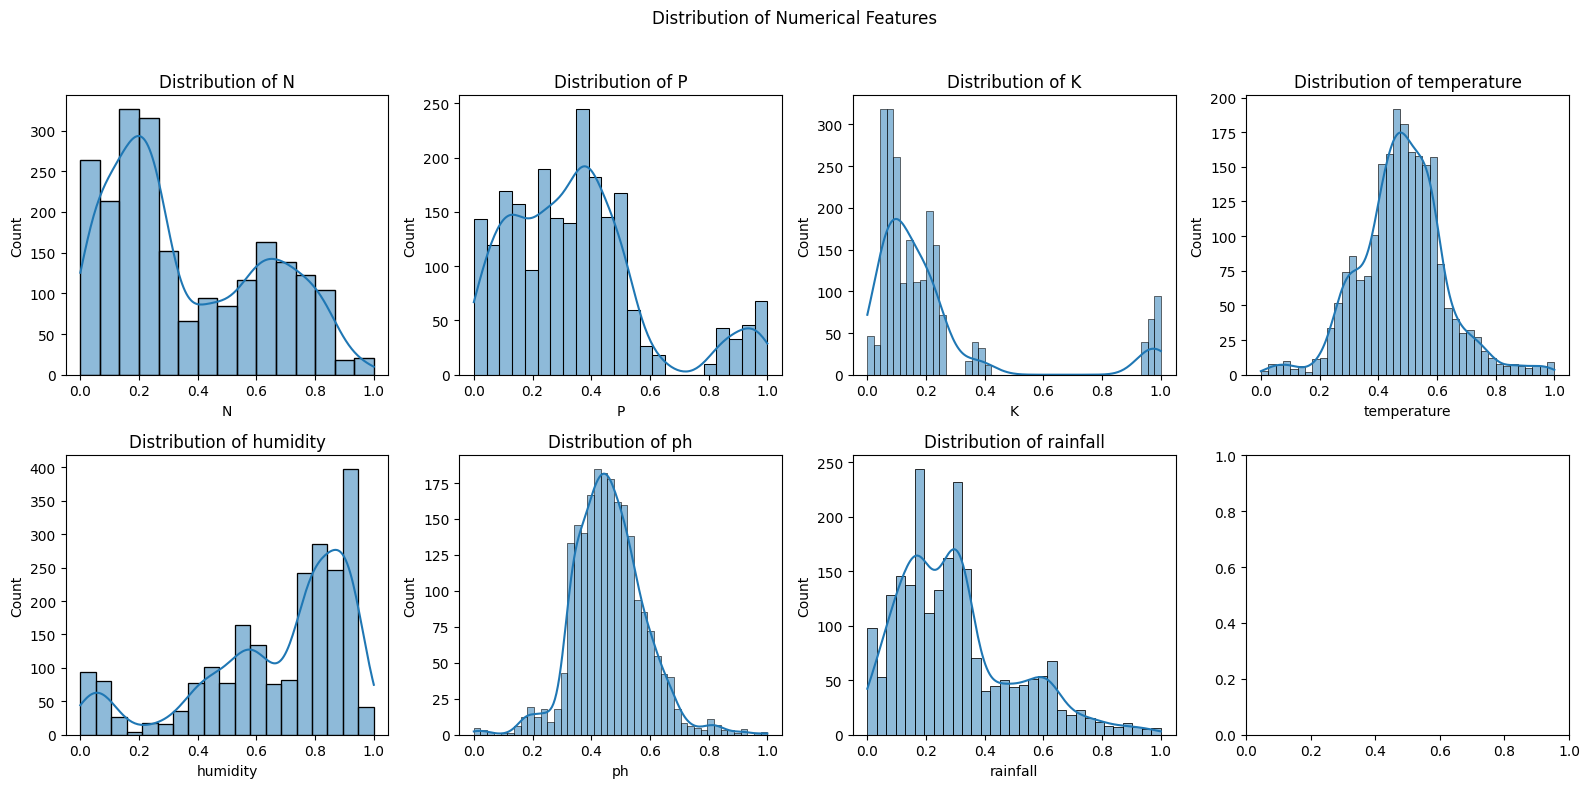

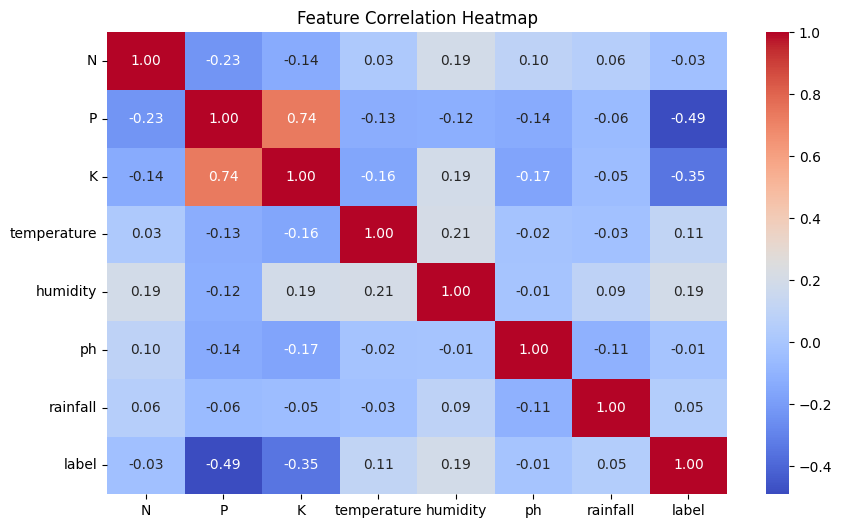

/var/folders/fv/wvd6zmm16r338c7g8r2gpyhm0000gn/T/ipykernel_5615/1226931419.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'], order=df['label'].value_counts().index, palette="viridis")


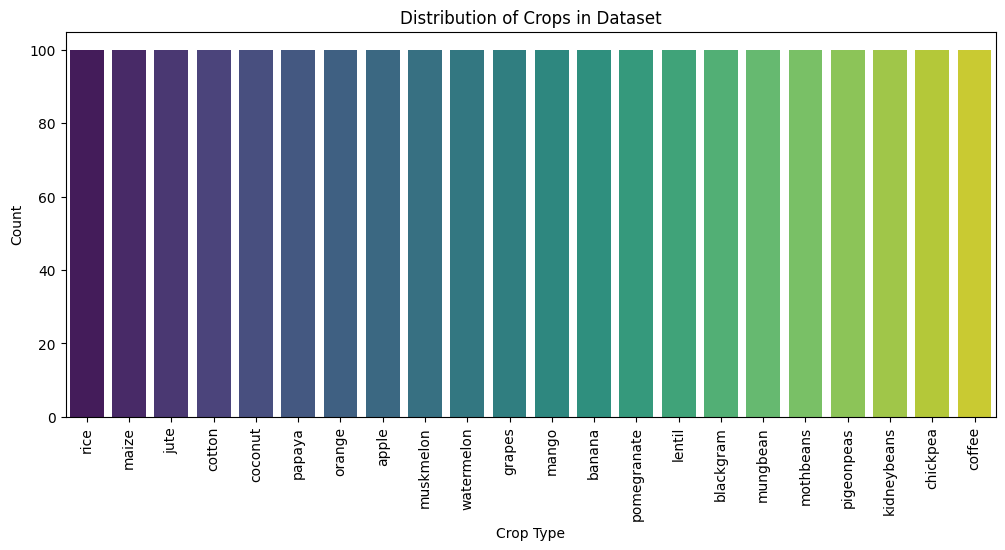

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Distribution of Numerical Features')

for i, col in enumerate(columns_to_normalize):
    sns.histplot(df_cleaned[col], kde=True, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'Distribution of {col}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

plt.figure(figsize=(12, 5))
sns.countplot(x=df['label'], order=df['label'].value_counts().index, palette="viridis")
plt.xticks(rotation=90)
plt.title("Distribution of Crops in Dataset")
plt.xlabel("Crop Type")
plt.ylabel("Count")
plt.show()

### **Analysis of Plots from EDA**


### **1. Distribution of Numerical Features**
**Observations from Histograms**
- **Nitrogen (N), Phosphorus (P), Potassium (K)**:  
  - These show **non-uniform distributions**.
  - Some crops require high nitrogen, while others need lower levels, creating a diverse spread.
  - Phosphorus and Potassium have more concentrated values, indicating specific needs for most crops.

- **Temperature & Humidity**:  
  - **Temperature** has a roughly **normal distribution**, suggesting a range of temperatures where most crops thrive.
  - **Humidity** is skewed towards **higher values**, meaning the dataset includes mostly crops suited for humid conditions.

- **pH Levels**:  
  - The **majority of values** are around **neutral to slightly acidic (6-7.5)**.
  - Few crops prefer highly acidic or highly alkaline soils.

- **Rainfall**:  
  - The distribution suggests that certain crops need significantly **higher** rainfall than others.
  - Some crops may be suitable for **dry conditions**, while others depend on **heavy monsoons**.

**Key Takeaways**  
- **Soil nutrients, temperature, and rainfall vary significantly** across different crops.  
- **pH levels are mostly clustered around neutral**, indicating that most crops thrive in balanced soil.  

### **2. Crop Distribution**
**Observations from the Crop Count Plot**
- **Imbalance in crop representation**:  
  - Some crops have significantly more data points than others.
  - The dataset may be biased toward specific crops (e.g., rice, wheat).
  
- **Potential impact on prediction models**:  
  - **Class imbalance** can affect prediction accuracy, making it harder to recommend underrepresented crops.

**Key Takeaways**  
- **We may need balancing techniques** (such as oversampling underrepresented crops or undersampling overrepresented ones).  
- **The model should not be biased toward common crops**, so careful evaluation is needed.


---

## Implementing the Model

In [ ]:

X = df_cleaned.drop(columns=['label'])
y = df_cleaned['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_model = RandomForestClassifier(n_estimators=300, max_depth=25, min_samples_split=4, min_samples_leaf=2, random_state=42, class_weight='balanced')

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\n=== Model Performance Metrics ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}\n")

print("=== Classification Report ===")
print(classification_rep)




=== Model Performance Metrics ===
Accuracy: 0.9932
Precision: 0.9935
Recall: 0.9932
F1 Score: 0.9932

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      0.95      0.97        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       0.95      1.00      0.98        20
          14       1.00      1.00      1.00        20
  

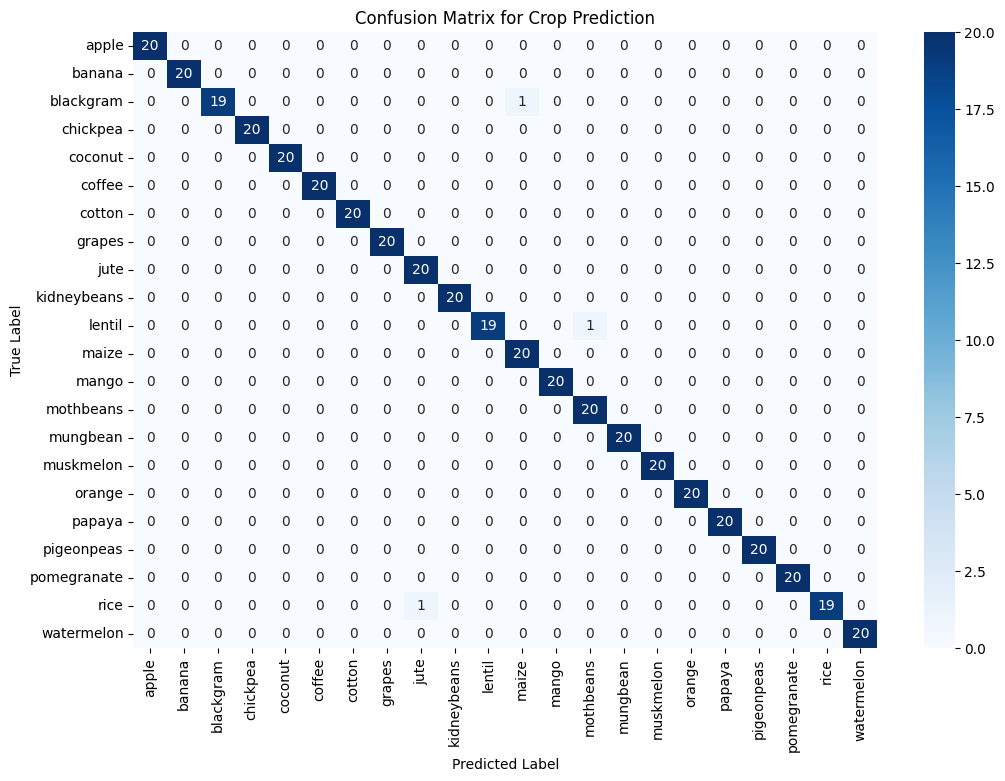

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Crop Prediction")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


## Conclusion


### Key Findings  
1. **High Model Accuracy**  
   - The model achieved **99.32% accuracy**, indicating strong predictive performance.  
   - Precision, recall, and F1-score were all above **99%**, ensuring reliable recommendations.  

2. **Minimal Misclassification**  
   - The confusion matrix showed that most crops were classified correctly.  
   - Minor misclassifications were observed in a few classes, which could be improved with further data refinement.  

3. **Feature Importance & Correlations**  
   - Soil nutrients (N, P, K), temperature, and rainfall played a significant role in crop prediction.  
   - Humidity and temperature showed an inverse correlation, aligning with known agricultural patterns.  
 
### Future Improvements  
- Expanding the dataset to include a wider variety of crops and conditions.  
- Incorporating additional environmental factors such as soil texture and climate history.  
- Developing a user-friendly application for real-time recommendations.  

### Conclusion  
This research demonstrates the potential of machine learning in optimizing agricultural practices. With further refinement, this system can be deployed to enhance data-driven decision-making in crop selection.